In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from soul_gan.models.utils import load_gan
from soul_gan.utils.general_utils import DotConfig

import yaml
from yaml import Loader
from pathlib import Path

import torch
import seaborn as sns
from matplotlib import pyplot as plt

from torchvision import transforms

In [3]:
gan_config = yaml.load(Path('../configs/gan_configs/dcgan.yml').open('r'), Loader)
gan_config = DotConfig(gan_config)

In [4]:
device = torch.device(0 if torch.cuda.is_available() else 'cpu')

In [5]:
gen, dis = load_gan(gan_config, device=device)

In [6]:
def get_dgz_stat(gen, dis, n_images=1000, batch_size=100, device=0):
    scores = []
    for _ in range(n_images // batch_size):
        z = torch.randn(batch_size, gen.z_dim, device=device)
        scores.extend(dis(gen(z)).tolist())

    return scores

In [7]:
scores = get_dgz_stat(gen, dis, device=device)

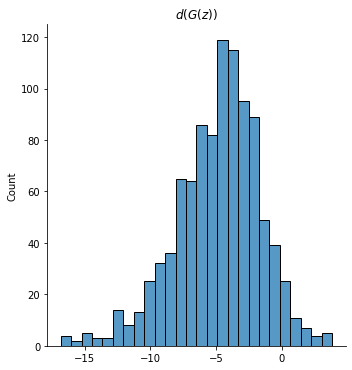

In [8]:
sns.displot(scores)

plt.title(r'$d(G(z))$')

plt.savefig('../figs/gan_stats/dcgan_dgz.png')
plt.show()

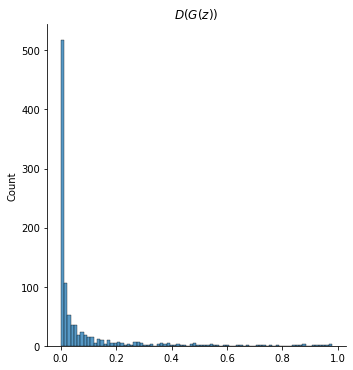

In [9]:
sns.displot(torch.sigmoid(torch.FloatTensor(scores)).tolist())

plt.title(r'$D(G(z))$')

plt.savefig('../figs/gan_stats/dcgan_Dgz.png')
plt.show()

In [10]:
f"{torch.sigmoid(torch.FloatTensor(scores)).mean().item():.3f}"

'0.080'

In [83]:
#z = torch.randn(10, gen.z_dim).to(device)
x = gen(z)

x = (x + 1) / 2
x = x.clamp(0, 1)


In [84]:
# inv_normalize = transforms.Normalize(
#     mean=[-0.5/0.5, -0.5/0.5, -0.5/0.5],
#     std=[1/0.5, 1/0.5, 1/0.5]
# )
# x = inv_normalize(x).detach().cpu().numpy()

x = x.detach().cpu().numpy()

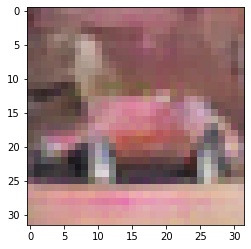

In [85]:
plt.imshow(x[6].transpose(1, 2, 0))

In [86]:
x

array([[[[0.4819952 , 0.55621254, 0.5826526 , ..., 0.7692243 ,
          0.778428  , 0.666017  ],
         [0.625181  , 0.6275407 , 0.61619705, ..., 0.7136781 ,
          0.73277617, 0.6872176 ],
         [0.66584975, 0.6600871 , 0.63337696, ..., 0.68685406,
          0.68963814, 0.7216382 ],
         ...,
         [0.6593252 , 0.6472115 , 0.66300756, ..., 0.6247207 ,
          0.6315771 , 0.61149156],
         [0.656948  , 0.65671366, 0.6608723 , ..., 0.63191915,
          0.6206447 , 0.6003248 ],
         [0.67137563, 0.65592825, 0.67143244, ..., 0.5864885 ,
          0.62294835, 0.6059655 ]],

        [[0.43160656, 0.498627  , 0.5357244 , ..., 0.6970288 ,
          0.7201431 , 0.621463  ],
         [0.54880726, 0.58428067, 0.58186   , ..., 0.6215664 ,
          0.6890408 , 0.65597045],
         [0.5950586 , 0.6117332 , 0.5757653 , ..., 0.6230091 ,
          0.663968  , 0.70452976],
         ...,
         [0.5804117 , 0.5615805 , 0.56331164, ..., 0.54848427,
          0.5472381 , 0.5